# Obtenção e análise de dados

---------------------------

### Bibliotecas

In [1]:
import pandas as pd

### Caminhos

In [2]:
bruto = pd.read_csv('Neutral_Graphene_Oxide_Nanoflake_Dataset.zip')

-------

## Análise dos dados escolhidos com a primeira escolha de atributos:

Uma vez escolhidos os targets, vamos agora escolher as features que melhor correlaciona com os os objetivos. Essas análises são para os targets de Energia de Fermi e Energia total do Flake.

----

In [3]:
# Excluir as colunas que tem NaN
bruto_completo = bruto.dropna(axis = 1, how ='any')
del bruto_completo['file_name']
del bruto_completo['charge_state']

In [4]:
#Calculado a matriz de correlação pet para ver quais atributos são bons para energia de Fermi
bruto_completo.shape
corrmat = bruto_completo.corr()

#### Energia total:

In [5]:
#printando os atributos que correlacionam melhor que 0.782 para energia de fermi
Atr1 = []
Ef = bruto_completo['Fermi_energy']
for i in corrmat['Fermi_energy'].keys():
    if abs(corrmat['Fermi_energy'][i]) > 0.782:
        Atr1.append(i)
        print(i, 'correlation:', corrmat['Fermi_energy'][i])
        print()

O_concentration correlation: -0.7963203388750189

C-C-C_C-sp2-C:error correlation: -0.8493752886340112

C-O_sp3-sp1:mean_value correlation: 0.847305780443348

C-O_sp3-strained:mean_value correlation: 0.8280893147336332

C-O-H:mean_value correlation: -0.8274333876940453

C-O-H_C-sp1-H:mean_value correlation: -0.8273869890961334

C-O_coordination_number correlation: -0.7868925300771553

density_loc_ether_mean correlation: -0.783175035923612

norm_density_ether_mean correlation: -0.7869970791019995

norm_Izz_bar_ether correlation: -0.7841549332099131

Fermi_energy correlation: 1.0



#### Energia de Fermi

In [6]:
#printando os atributos que correlacionam melhor que 0.93 para energia total
Et = bruto_completo['total_energy']
Atr2 = []
for i in corrmat['total_energy'].keys():
    if abs(corrmat['total_energy'][i]) > 0.93:
        print(i, corrmat['total_energy'][i])
        Atr2.append(i)
        print()

C -0.9451088774529183

H -0.9415750852322793

atom_number_total -0.997881550895204

area -0.946461806575993

all_agent_group_count -0.9546818573050628

C-C:total_number -0.9442555104184308

C-C_sp2-sp3:total_number -0.9376195769770793

C-C-C:total_number -0.9432530823044715

rings_total_number_10_all -0.9333293400696462

rings_total_number_6_all -0.9377238761263992

rings_total_number_6_sp -0.9375247370495672

Ixx_ether -0.9343988890313029

Izz_ether -0.9393554727019133

norm_Ixx_ether -0.9310057193670633

norm_Izz_ether -0.9354374049002103

total_energy 1.0



### Para entender a relação das feautures com os targets, plotamos os gráficos da regressão linear (análise exploratória):

In [7]:
import lmfit 
import matplotlib.pyplot as plt

In [8]:
def plotar(x, y, ux = 0, uy = 0, reta = False, legendas = ['x', 'y'], c='b', save = False, line = False):
    '''
    Essa função plota um gráfico de pontos ou de linha com ou sem barras de incerteza e com ou sem regressão linear.
    Argumentos obrigatórios:
    - x: Lista valores de x
    - y: Lista valores de y
    
    Argumentos opcionais:
    - ux: Lista com os valores de incertezas de x (dafault: ux = 0)
    - uy: Lista com os valores de incertezas de y (dafault: uy = 0)
    - reta: bool que define se quer regressão linear ou não (default: reta = False)
    - legendas: lista com duas strings correspondentes àa legendaa do eixo x e y (default: legendas = ['x', 'y'])
    - c: string da cor dos pontos (default: c = 'b')
    - save: string com o nome de um arquivo png, ou o bool False para não salvar (default: save = False)
    
    '''
    config = {'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.edgecolor': '.4',
    'axes.labelcolor': '.0',
    'axes.titlesize': 'large',
    'axes.labelsize': 'medium',
    'figure.autolayout': True,
    'figure.figsize': (4.5, 3.5),
    'font.family': ['serif'],
    'font.size': 10.0,
    'grid.linestyle': '--',
    'legend.facecolor': '.9',
    'legend.frameon': True,
    'savefig.transparent': True,
    'text.color': '.0',
    'xtick.labelsize': 'small',
    'ytick.labelsize': 'small',}

    plt.style.use(['seaborn-whitegrid', 'seaborn-paper', 'seaborn-muted', config])
    fig,ax1 = plt.subplots(1,1)
    ax1.tick_params(direction='in', which='both',top=True,right=True,labelsize=12)
    
    #Labels
    ax1.set_ylabel(legendas[1], fontsize=12)
    ax1.set_xlabel(legendas[0], fontsize=12)
    #regressão linear
    if reta == True:
        def reta(x, a, b):
            return a*x + b

        reta_model=lmfit.Model(reta)

        #se der errado tentar mexer nesses valores do chute inicial:
        
        reta_model.set_param_hint('a',value=1,min= -1000000,max=3000000,vary=True) 
        reta_model.set_param_hint('b',value=1,min=-200000,max=2000000,vary=True) 
        param = reta_model.make_params()

        results = reta_model.fit(y, x = x, params = param)
        #print(results.fit_report())
        ax1.plot(x, y, 'o', markersize=0.3)
        ax1.plot(x,results.best_fit,label="Regressão Linear", c = 'r', linewidth=2) ; ax1.legend(fontsize='small')
    if line == True:
        ax1.plot(x, y)
    elif ux == 0 and uy == 0:
        ax1.plot(x, y, 'bo')

    else:
        ax1.errorbar(x, y, yerr=uy, xerr=ux, fmt='o',elinewidth=1,capsize=3,capthick=1,ms=3,c=c,ecolor='black')
    #save
    if save != False:
        plt.tight_layout()
        plt.savefig(save, dpi=200)
        plt.show()

#### Energia de Fermi

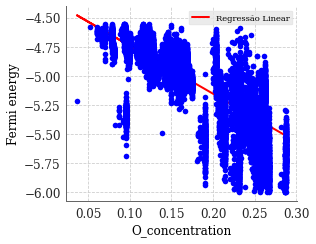

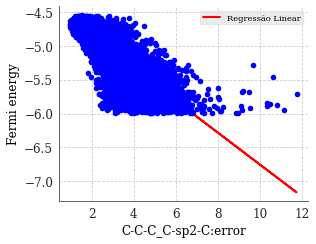

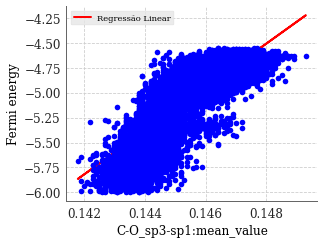

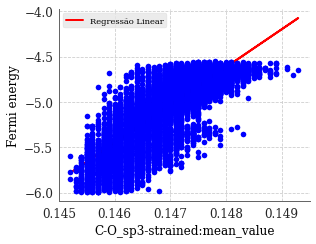

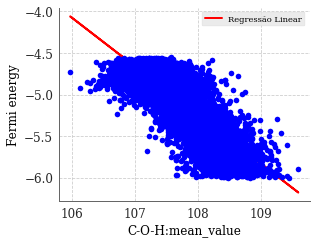

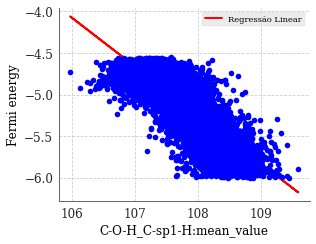

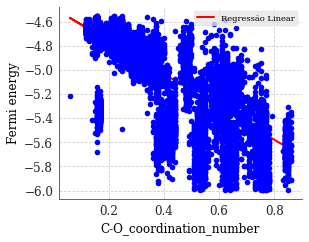

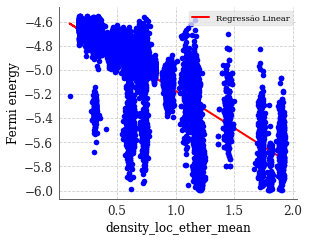

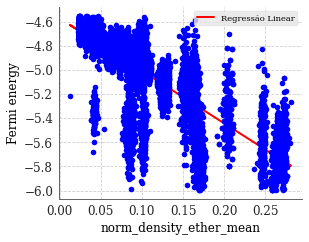

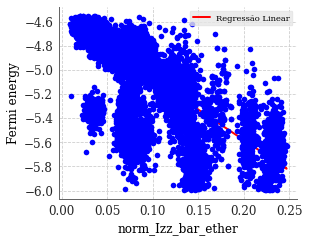

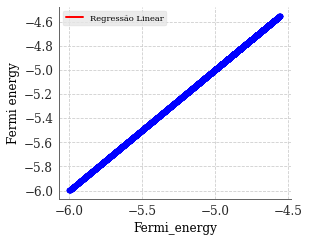

In [9]:
#Atr1.remove(Atr1[-1])
for i in Atr1:
    plotar(bruto_completo[i], Ef, legendas = [i, 'Fermi energy'],reta = True)

Existem algumas features com comportamento mais ou menos linear com os targets e outro parecem ter uma distribuição mais aleatória.

-----

#### Energia Total

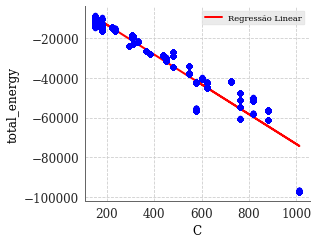

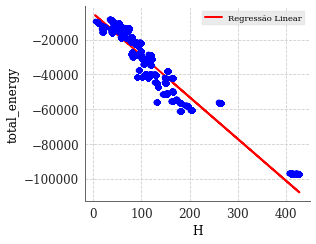

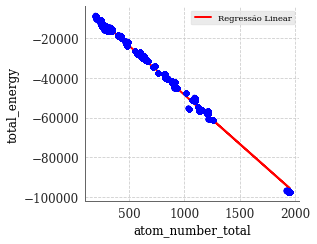

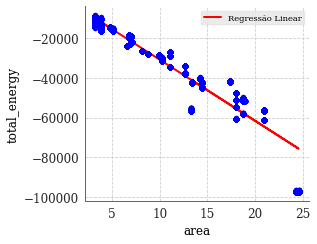

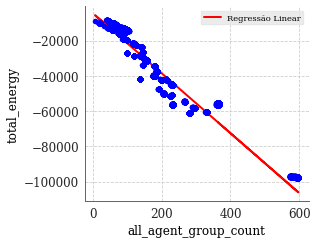

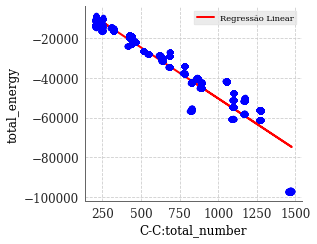

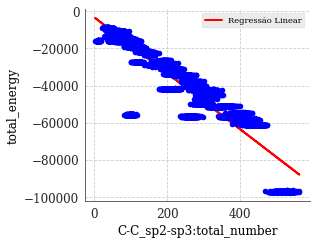

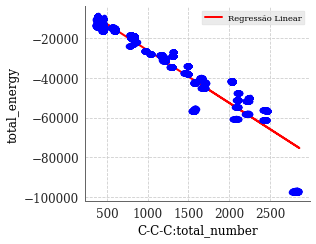

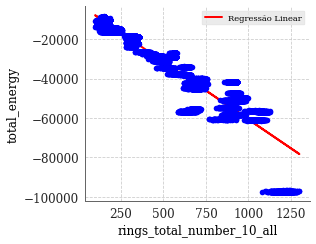

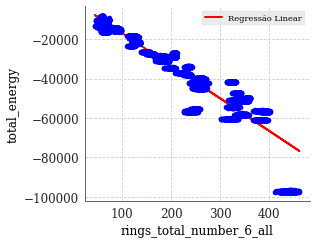

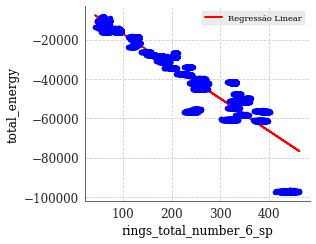

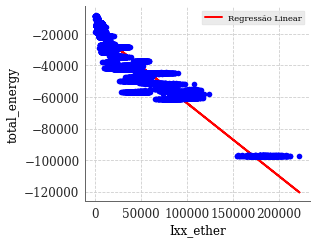

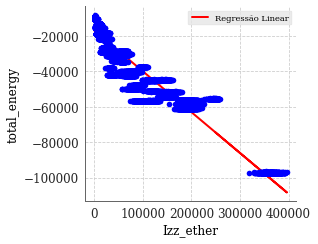

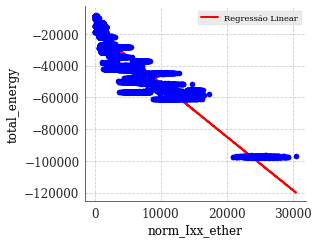

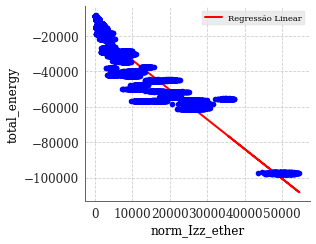

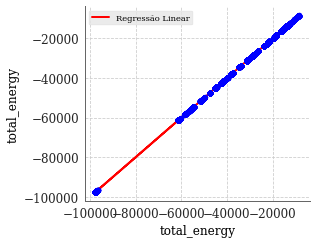

In [10]:
#Atr2.remove(Atr2[-1])
for i in Atr2:
    plotar(bruto_completo[i], Et, legendas = [i, 'total_energy'], reta = True)

A energia total possui um comportamento bastante linear com varios features, e alguns possuem um possivelmente de curva polinomial, talvez de segundo grau, por exemplo.

--------

### Matriz de correlação

#### Energia de Fermi

In [11]:
dataEf = {}
for i in Atr1:
    dataEf.update({i:bruto[i]})
dataEf = pd.DataFrame(dataEf)

In [12]:
import seaborn as sns

<AxesSubplot:>

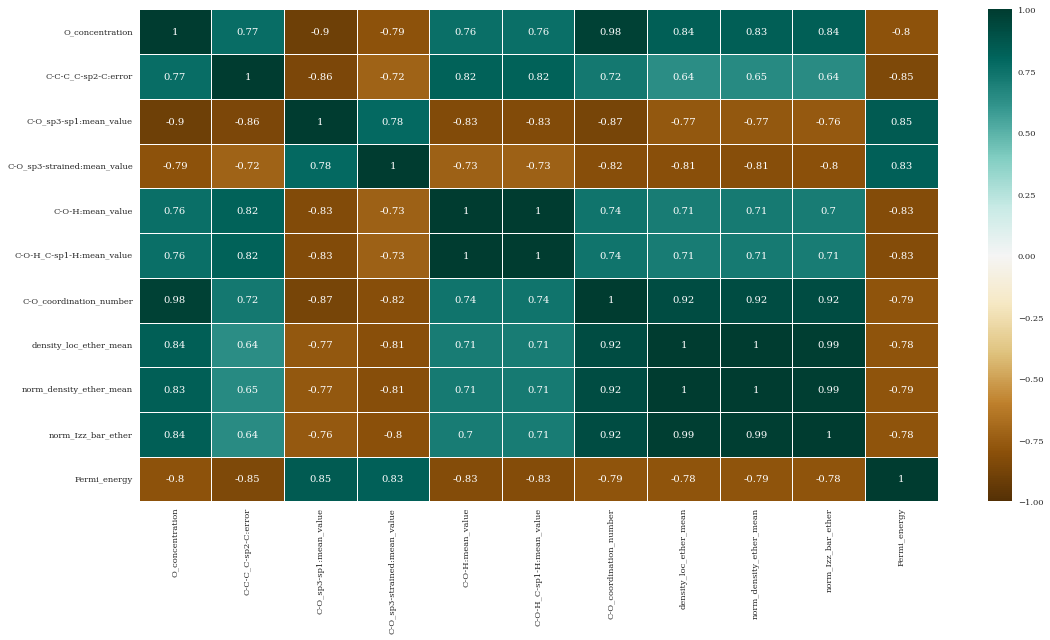

In [13]:
# Plotar o gráfico de correlações entre as features que relacionam com fermi
corrmat1 = dataEf.corr()
f, ax = plt.subplots(figsize =(16, 9))
sns.heatmap(corrmat1, ax = ax, cmap ="BrBG", linewidths = 1, vmin=-1, vmax=1, annot=True)

In [14]:
dataEt = {}
for i in Atr2:
    dataEt.update({i:bruto[i]})
dataEt = pd.DataFrame(dataEt)

<AxesSubplot:>

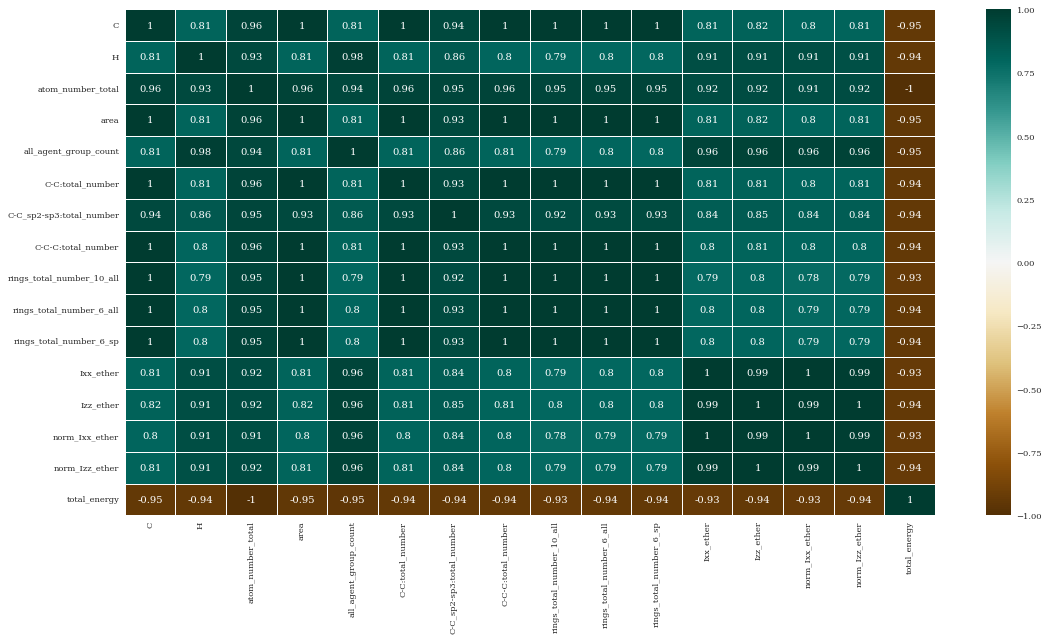

In [15]:
corrmat1 = dataEt.corr()
f, ax = plt.subplots(figsize =(16, 9))
sns.heatmap(corrmat1, ax = ax, cmap ="BrBG", linewidths = 1, vmin=-1, vmax=1, annot=True)

In [16]:
del bruto_completo['Shape']

In [17]:
import numpy as np

In [18]:
atributos_1 = {}
for i in bruto_completo.keys():
    if np.isfinite(corrmat['Fermi_energy'][i]):
        atributos_1.update({i : abs(corrmat['Fermi_energy'][i])})

In [19]:
L = sorted(atributos_1,key = atributos_1.get,  reverse = True)
L.remove('Fermi_energy')
print(L[0])

C-C-C_C-sp2-C:error


In [20]:
L = L[0:100]
L1 = L.copy()
for i in L:
    for k in L:
        if i < k and abs(corrmat[i][k])>0.8:
            if abs(corrmat['Fermi_energy'][i]) > abs(corrmat['Fermi_energy'][k]) and k in L1 and i in L1:
                L1.remove(k)
            elif k in L1 and i in L1:
                L1.remove(i)

In [21]:
#Esses serão os atributos para calcular a energia de Fermi (resta saber o que eles significam
for i in L1:
    print(i, ' correlation:',corrmat['Fermi_energy'][i])
    print()

C-C-C_C-sp2-C:error  correlation: -0.8493752886340112

C-O_sp3-strained:mean_value  correlation: 0.8280893147336332

O_concentration  correlation: -0.7963203388750189

prox_density_ether_std  correlation: -0.7671642099092737

ether_concentration  correlation: -0.748605347198668

sp2-like_n11_m1  correlation: -0.7142996934772669

sp2-like_n7_m1  correlation: -0.6851143265163185

sp2-like_n10_m7  correlation: 0.6835392201813018

H-O_coordination_number  correlation: -0.6604414170523452

Ixx_bar_O_area  correlation: -0.650952320898928



<AxesSubplot:>

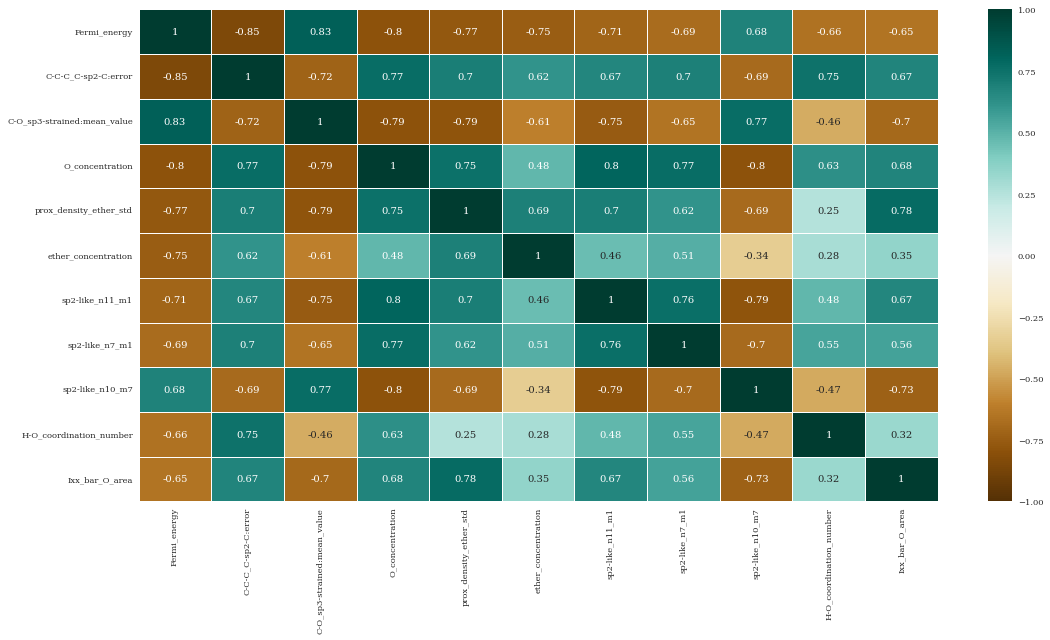

In [22]:
M = {}
M.update({'Fermi_energy':bruto['Fermi_energy']})
for i in L1:
    M.update({i:bruto[i]})
M = pd.DataFrame(M)
corrmat_F = M.corr()
f, ax = plt.subplots(figsize =(16, 9))
sns.heatmap(corrmat_F, ax = ax, cmap ="BrBG", linewidths = 1, vmin=-1, vmax=1, annot=True)
#plt.savefig('atributos_energia_fermi.png', dpi = 200)

In [23]:
Dados_Fermi = M.copy()

In [24]:
Dados_Fermi.to_csv("CSVs\Dados_Fermi.csv")

#### Energia total

In [25]:
atributos_2 = {}
for i in bruto_completo.keys():
    if np.isfinite(corrmat['total_energy'][i]):
        atributos_2.update({i : abs(corrmat['total_energy'][i])})

In [26]:
L2 = sorted(atributos_2,key = atributos_2.get,  reverse = True)
L2.remove('total_energy')
print(L2[0])

atom_number_total


In [27]:
L2 = L2[0:100]
Lb = L2.copy()
for i in L2:
    for k in L2:
        if i < k and abs(corrmat[i][k])>0.7:
            if abs(corrmat['total_energy'][i]) > abs(corrmat['total_energy'][k]) and k in Lb and i in Lb:
                Lb.remove(k)
            elif k in Lb and i in Lb:
                Lb.remove(i)

In [28]:
#Esses serão os atributos para calcular a energia de Fermi (resta saber o que eles significam)
for i in Lb:
    print(i, ' correlation:',corrmat['total_energy'][i])
    print()

atom_number_total  correlation: -0.997881550895204



Como observamos pelos gráficos a única coisa que relacionava com a energia total do flake é o número de átomos. Por isso, preferimos mudar a nossa abordagem e utilizar como target a energia por átomos.

-----------

## Segunda tentativa (energia por átomo):

Nesse momento, mudamos o target para energia por átomo.

In [29]:
# Função para criar lista (p/ cada exemplo ) do número de átomos e verificar se existem NaNs:
E = []
i = 0
while i < len(bruto_completo['C']):
    E.append(bruto_completo['total_energy'][i]/bruto_completo['atom_number_total'][i])
    i = i+1
print(len(bruto_completo['total_energy']), len(E))

20396 20396


In [30]:
Dados = bruto_completo.assign(energy_per_atom = E) # Acrescentando uma coluna que nos dá E = a energia por átomos. Que consiste na divisão da energia total do flake pelo n° de átomo

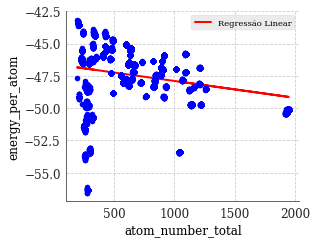

In [31]:
plotar(Dados['atom_number_total'], Dados['energy_per_atom'], legendas = ['atom_number_total', 'energy_per_atom'], reta = True)
#A energia agora não está totalmente dependente do número de átomos

In [32]:
#Cria a matriz de correlação 
Dados.shape
corrmat = Dados.corr()

In [33]:
#Pegar as colunas em que foi possível calcular a correlação
atributos_3 = {}
for i in Dados.keys():
    if np.isfinite(corrmat['energy_per_atom'][i]): #Se não for Nan, adiciona a atributos_2
        atributos_2.update({i : abs(corrmat['energy_per_atom'][i])})

In [34]:
#Selecionar os atributos que tem uma alta correlação, exceto aqueles em que a correlação é 1
L3 = sorted(atributos_2,key = atributos_2.get,  reverse = True)
L3.remove('energy_per_atom')
L3.remove('Fermi_energy')
print(L3[0])

O_concentration


In [35]:
L3 = L3[0:100]
Lb = L3.copy()
for i in L3:
    for k in L3:
        if i < k and abs(corrmat[i][k])>0.76:
            if abs(corrmat['energy_per_atom'][i]) > abs(corrmat['energy_per_atom'][k]) and k in Lb and i in Lb:
                Lb.remove(k)
            elif k in Lb and i in Lb:
                Lb.remove(i)

In [36]:
#Esses serão os atributos para calcular a energia de Fermi (resta saber o que eles significam)
for i in Lb:
    print(i, ' correlation:',corrmat['energy_per_atom'][i])
    print()

O_concentration  correlation: -0.8299191686318905

C-O-H_C-sp1-H:mean_value  correlation: -0.8212234491054174

ether_concentration  correlation: -0.7955157362883112

H-O_coordination_number  correlation: -0.7068848574699098

O_n12_m2  correlation: -0.7038669489116787

prox_Ixx_ether_area  correlation: -0.6907417275908344

norm_density_ether_std  correlation: -0.6794314482265577

sp2-like_n11_m3  correlation: -0.673224189008881

max_bond_angle  correlation: -0.6122274265471346



#### Matriz de correlação

<AxesSubplot:>

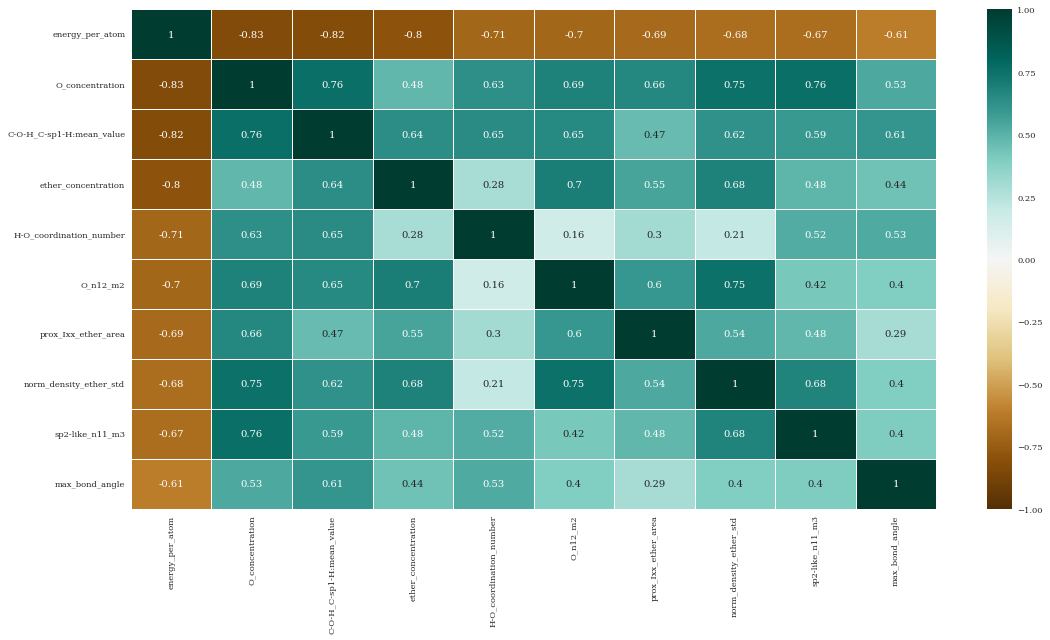

In [37]:
M = {}
M.update({'energy_per_atom':Dados['energy_per_atom']})
for i in Lb:
    M.update({i:bruto[i]})
M = pd.DataFrame(M)
corrmat_F = M.corr()
f, ax = plt.subplots(figsize =(16, 9))
sns.heatmap(corrmat_F, ax = ax, cmap ="BrBG", linewidths = 1, vmin=-1, vmax=1, annot=True)
#plt.savefig('atributos_energia_por_atomo.png', dpi = 200)

In [38]:
Dados_energia = M.copy()

In [39]:
Dados_energia.to_csv("CSVs\Dados_energia.csv")
#Pegamos todos os dados que escolhemos através das correlações e criamos um novo csv

Vamos agora utilizar os Data Frames com os dados que nós realmente vamos utilizar, de energia de Fermi e por átomo.

In [40]:
#caminhos para fazer os DataFrames
df_fermi = pd.read_csv ("CSVs\Dados_Fermi.csv")
df_energia= pd.read_csv("CSVs\Dados_energia.csv")

Dessa forma, temos dois datasets para prever os dados com as features relevantes para cada target.

### Tarefa de análise exploratória dos dados

Análise dos datasets:

In [41]:
print(df_fermi.dtypes,df_energia.dtypes)

Unnamed: 0                       int64
Fermi_energy                   float64
C-C-C_C-sp2-C:error            float64
C-O_sp3-strained:mean_value    float64
O_concentration                float64
prox_density_ether_std         float64
ether_concentration            float64
sp2-like_n11_m1                float64
sp2-like_n7_m1                 float64
sp2-like_n10_m7                float64
H-O_coordination_number        float64
Ixx_bar_O_area                 float64
dtype: object Unnamed: 0                    int64
energy_per_atom             float64
O_concentration             float64
C-O-H_C-sp1-H:mean_value    float64
ether_concentration         float64
H-O_coordination_number     float64
O_n12_m2                    float64
prox_Ixx_ether_area         float64
norm_density_ether_std      float64
sp2-like_n11_m3             float64
max_bond_angle              float64
dtype: object


In [42]:
# dados da energia de fermi
df_fermi
print( df_fermi.describe())

         Unnamed: 0  Fermi_energy  C-C-C_C-sp2-C:error  \
count  20396.000000  20396.000000         20396.000000   
mean   10197.500000     -4.957352             2.373081   
std     5887.962381      0.296436             1.069291   
min        0.000000     -5.999400             0.980000   
25%     5098.750000     -5.046975             1.670000   
50%    10197.500000     -4.866700             2.070000   
75%    15296.250000     -4.760875             2.700000   
max    20395.000000     -4.550700            11.740000   

       C-O_sp3-strained:mean_value  O_concentration  prox_density_ether_std  \
count                 20396.000000     20396.000000            20396.000000   
mean                      0.147182         0.152450                0.405088   
std                       0.000588         0.057251                0.173177   
min                       0.145200         0.036649                0.052855   
25%                       0.146900         0.116279                0.287281   
50%

In [43]:
#dados da energia por átomo
print(df_energia.describe())

         Unnamed: 0  energy_per_atom  O_concentration  \
count  20396.000000     20396.000000     20396.000000   
mean   10197.500000       -47.411872         0.152450   
std     5887.962381         2.340781         0.057251   
min        0.000000       -56.538455         0.036649   
25%     5098.750000       -48.594539         0.116279   
50%    10197.500000       -46.847004         0.142064   
75%    15296.250000       -45.807262         0.173293   
max    20395.000000       -43.156884         0.287908   

       C-O-H_C-sp1-H:mean_value  ether_concentration  H-O_coordination_number  \
count              20396.000000         20396.000000             20396.000000   
mean                 107.504723             0.304668                 0.466049   
std                    0.419334             0.114202                 0.216221   
min                  105.970000             0.100000                 0.060000   
25%                  107.220000             0.231481                 0.330000   


In [44]:
def histograma(x, density=False, c = 'r', bins = 'sqrt', save = False, legendas = ['x', 'Frequência'], title = 'Histograma'):
    '''
    Plota um histograma a partir de uma lista de dados.
    Argumentos obrigatórios:
    - x: Lista dos valores da medição/dados
    
    Argumentos opcionais:
    - Density: bool que, se for True, faz com que o histograma mostre densidade de probabilidade (default: density=False)
    - c: string para a cor das barras do histograma (default: c = 'r')
    - bins: método de determinação do tamanho de intervalos do histograma (default: bins = 'sqrt')
    - save: string com o nome do arquivo png para salvar o grafico. Se save = False, então não irá salvar. (default: save = False)
    - legendas: lista das strings de legenda dos eixos (default: legendas = ['x', 'Frequência'])
    
    '''
    config = {'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.edgecolor': '.4',
    'axes.labelcolor': '.0',
    'axes.titlesize': 'large',
    'axes.labelsize': 'medium',
    'figure.autolayout': True,
    'figure.figsize': (4.5, 3.5),
    'font.family': ['serif'],
    'font.size': 10.0,
    'grid.linestyle': '--',
    'legend.facecolor': '.9',
    'legend.frameon': True,
    'savefig.transparent': True,
    'text.color': '.0',
    'xtick.labelsize': 'small',
    'ytick.labelsize': 'small',}
    
    plt.style.use(['seaborn-whitegrid', 'seaborn-paper', 'seaborn-muted', config])
    fig,axh = plt.subplots(1,1)
    H = plt.hist(x,bins = bins, color = c,density = density)
    axh.set_title(title)
    axh.set_ylabel(legendas[1],fontsize=12)
    axh.set_xlabel(legendas[0],fontsize=12)
    if save != False:
        plt.savefig(save, dpi=200)

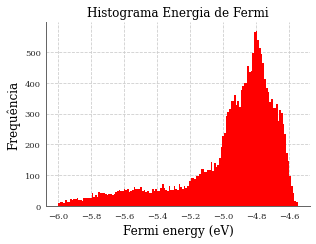

In [45]:
#histograma(bruto_completo['Fermi_energy'], legendas = ['Fermi energy (eV)', 'Frequência'],title = 'Histograma Energia de Fermi', save = 'histograma_fermi.png')

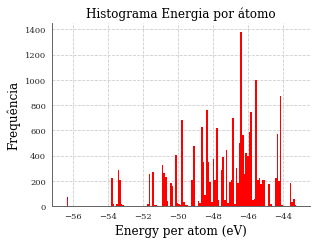

In [46]:
#histograma(M['energy_per_atom'], legendas = ['Energy per atom (eV)', 'Frequência'],title = 'Histograma Energia por átomo', save = 'histograma_energia.png')